In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
target=train["Loan_Status"]

In [3]:
train=train.drop(["Loan_Status"],axis=1)
train.shape,test.shape

((614, 12), (367, 12))

In [4]:
combined=pd.concat([train,test])

In [5]:
combined.shape

(981, 12)

In [6]:
combined=combined.reset_index(drop=True)

In [7]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [8]:
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 92.1+ KB


2.714035799071379

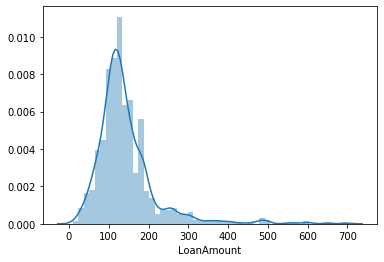

In [10]:
sns.distplot(combined["LoanAmount"])
combined["LoanAmount"].skew()

0.3684549777649046

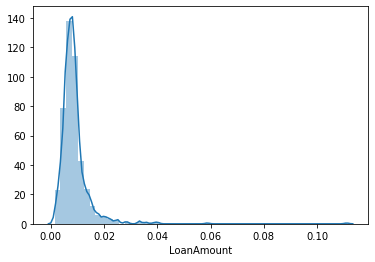

In [11]:
sns.distplot(np.reciprocal(combined["LoanAmount"]))
np.reciprocal(combined["LoanAmount"].skew())

In [12]:
combined["LoanAmount_skew"]=np.reciprocal(combined["LoanAmount"])

In [13]:
combined["Total_incom"]=combined["ApplicantIncome"]+combined["CoapplicantIncome"]

6.042452559462701

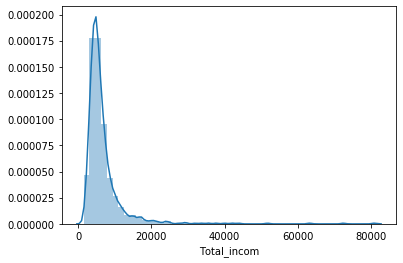

In [14]:
sns.distplot(combined["Total_incom"])
combined["Total_incom"].skew()

0.9084768638968924

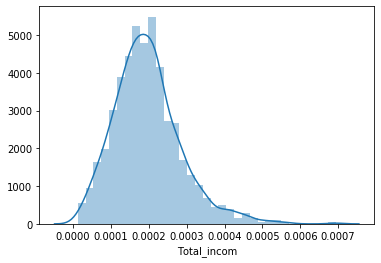

In [15]:
sns.distplot(np.power(combined["Total_incom"],-1))
np.power(combined["Total_incom"],-1).skew()

In [16]:
combined["Total_incom_skew"]=np.power(combined["Total_incom"],-1)

In [17]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_skew,Total_incom,Total_incom_skew
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,NaN,5849.0,0.000171
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.007812,6091.0,0.000164
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0.015152,3000.0,0.000333
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0.008333,4941.0,0.000202
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0.007092,6000.0,0.000167


In [18]:
combined=combined.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)

In [19]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_skew,Total_incom,Total_incom_skew
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,NaN,5849.0,0.000171
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0.007812,6091.0,0.000164
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,0.015152,3000.0,0.000333
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,0.008333,4941.0,0.000202
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,0.007092,6000.0,0.000167


In [20]:
combined["EMI"]=combined["LoanAmount"]/combined["Loan_Amount_Term"]

In [21]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_skew,Total_incom,Total_incom_skew,EMI
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,NaN,5849.0,0.000171,NaN
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0.007812,6091.0,0.000164,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,0.015152,3000.0,0.000333,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,0.008333,4941.0,0.000202,0.333333
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,0.007092,6000.0,0.000167,0.391667


In [22]:
combined["EMI"]=combined["EMI"].fillna(combined["EMI"].mean())

In [23]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_skew,Total_incom,Total_incom_skew,EMI
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,NaN,5849.0,0.000171,0.496706
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0.007812,6091.0,0.000164,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,0.015152,3000.0,0.000333,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,0.008333,4941.0,0.000202,0.333333
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,0.007092,6000.0,0.000167,0.391667


In [24]:
combined["Balance_incom"]=combined["Total_incom_skew"]-combined["EMI"]

In [25]:
combined=combined.drop(["Total_incom"],axis=1)

In [26]:
combined=combined.drop(["LoanAmount"],axis=1)

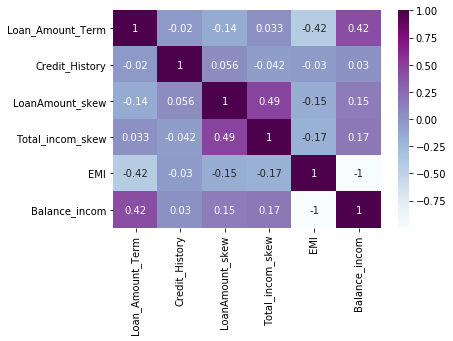

In [27]:
sns.heatmap(combined.corr(),cmap="BuPu",annot=True)

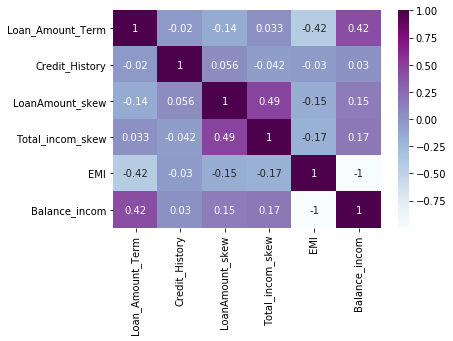

In [28]:
sns.heatmap(combined.corr(),cmap="BuPu",annot=True)

In [29]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_skew,Total_incom_skew,EMI,Balance_incom
0,LP001002,Male,No,0,Graduate,No,360.0,1.0,Urban,NaN,0.000171,0.496706,-0.496536
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0.007812,0.000164,0.355556,-0.355391
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,0.015152,0.000333,0.183333,-0.183000
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,0.008333,0.000202,0.333333,-0.333131
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,0.007092,0.000167,0.391667,-0.391500


In [30]:
combined["Dependents"]=combined["Dependents"].replace({"0":0,"1":1,"2":2,"3+":3,})

In [31]:
#Num_features
combined["Gender"]=combined["Gender"].fillna(combined["Gender"].mode()[0])
combined["Married"]=combined["Married"].fillna(combined["Married"].mode()[0])
combined["Dependents"]=combined["Dependents"].fillna(combined["Dependents"].mode()[0])
combined["Self_Employed"]=combined["Self_Employed"].fillna(combined["Self_Employed"].mode()[0])

#Cat_features
combined["Credit_History"]=combined["Credit_History"].fillna(combined["Credit_History"].mode()[0])

In [32]:
combined["Loan_Amount_Term"]=combined["Loan_Amount_Term"].fillna(combined["Loan_Amount_Term"].mode()[0])
combined["LoanAmount_skew"]=combined["LoanAmount_skew"].fillna(combined["LoanAmount_skew"].median())

In [33]:
combined.isnull().any()

Loan_ID             False
Gender              False
Married             False
Dependents          False
Education           False
Self_Employed       False
Loan_Amount_Term    False
Credit_History      False
Property_Area       False
LoanAmount_skew     False
Total_incom_skew    False
EMI                 False
Balance_incom       False
dtype: bool

In [34]:
target_values={"Male":1,"Female":0,
              "Yes":1,"No":0,
              "Graduate":1,"Not Graduate":0,
              "Urban":0,"Rural":1,"Semiurban":3,
               'Y': 1 , 'N' : 0 , "0":0 , "1":1 , "2":2 , "3+":3 }

In [35]:
Dummies=pd.get_dummies(combined.drop(["Loan_ID"],axis=1), drop_first=True)

In [36]:
Dummies.head()

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_skew,Total_incom_skew,EMI,Balance_incom,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,360.0,1.0,0.007937,0.000171,0.496706,-0.496536,1,0,0,0,0,1
1,1.0,360.0,1.0,0.007812,0.000164,0.355556,-0.355391,1,1,0,0,0,0
2,0.0,360.0,1.0,0.015152,0.000333,0.183333,-0.183000,1,1,0,1,0,1
3,0.0,360.0,1.0,0.008333,0.000202,0.333333,-0.333131,1,1,1,0,0,1
4,0.0,360.0,1.0,0.007092,0.000167,0.391667,-0.391500,1,0,0,0,0,1


In [37]:
Dummies.describe()

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_skew,Total_incom_skew,EMI,Balance_incom,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.767584,342.564730,0.849134,0.008858,0.000197,0.496706,-0.496510,0.814475,0.646279,0.222222,0.121305,0.355759,0.348624
std,1.030657,64.482011,0.358101,0.005840,0.000089,0.942993,0.943009,0.388921,0.478368,0.415952,0.326648,0.478987,0.476778
min,0.000000,6.000000,0.000000,0.001429,0.000012,0.025000,-21.666575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,360.000000,1.000000,0.006250,0.000137,0.291667,-0.496625,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,360.000000,1.000000,0.007937,0.000188,0.372222,-0.372063,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,360.000000,1.000000,0.009901,0.000240,0.496706,-0.291450,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,480.000000,1.000000,0.111111,0.000693,21.666667,-0.024579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
train = Dummies.head(614)
test = Dummies.iloc[614:]

In [39]:
train.head()

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_skew,Total_incom_skew,EMI,Balance_incom,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,360.0,1.0,0.007937,0.000171,0.496706,-0.496536,1,0,0,0,0,1
1,1.0,360.0,1.0,0.007812,0.000164,0.355556,-0.355391,1,1,0,0,0,0
2,0.0,360.0,1.0,0.015152,0.000333,0.183333,-0.183000,1,1,0,1,0,1
3,0.0,360.0,1.0,0.008333,0.000202,0.333333,-0.333131,1,1,1,0,0,1
4,0.0,360.0,1.0,0.007092,0.000167,0.391667,-0.391500,1,0,0,0,0,1


In [40]:
test=test.reset_index(drop=True)

In [41]:
test_copy=test.copy()

In [42]:
test.head()

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_skew,Total_incom_skew,EMI,Balance_incom,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,360.0,1.0,0.009091,0.000175,0.305556,-0.305381,1,1,0,0,0,1
1,1.0,360.0,1.0,0.007937,0.000219,0.350000,-0.349781,1,1,0,0,0,1
2,2.0,360.0,1.0,0.004808,0.000147,0.577778,-0.577631,1,1,0,0,0,1
3,2.0,360.0,1.0,0.010000,0.000205,0.277778,-0.277573,1,1,0,0,0,1
4,0.0,360.0,1.0,0.012821,0.000305,0.216667,-0.216361,1,0,1,0,0,1


In [44]:
scaler=MinMaxScaler()

In [45]:
for col in test.columns:
    test[col]=scaler.fit_transform(test[col].values.reshape(-1,1))

In [46]:
test.head()

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_skew,Total_incom_skew,EMI,Balance_incom,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.746835,1.0,0.214559,0.290475,0.009659,0.990336,1.0,1.0,0.0,0.0,0.0,1.0
1,0.333333,0.746835,1.0,0.180502,0.369311,0.011719,0.988278,1.0,1.0,0.0,0.0,0.0,1.0
2,0.666667,0.746835,1.0,0.088196,0.240391,0.022279,0.977714,1.0,1.0,0.0,0.0,0.0,1.0
3,0.666667,0.746835,1.0,0.241379,0.344302,0.008371,0.991625,1.0,1.0,0.0,0.0,0.0,1.0
4,0.000000,0.746835,1.0,0.324590,0.525732,0.005538,0.994463,1.0,0.0,1.0,0.0,0.0,1.0


In [47]:
X=train.copy()
y=pd.read_csv("train.csv")["Loan_Status"]

In [48]:
for col in X.columns:
    X[col]=scaler.fit_transform(X[col].values.reshape(-1,1))

In [49]:
X.head()

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_skew,Total_incom_skew,EMI,Balance_incom,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.74359,1.0,0.059334,0.232881,0.051133,0.948841,1.0,0.0,0.0,0.0,0.0,1.0
1,0.333333,0.74359,1.0,0.058204,0.222909,0.035833,0.964141,1.0,1.0,0.0,0.0,0.0,0.0
2,0.000000,0.74359,1.0,0.125115,0.471254,0.017164,0.982828,1.0,1.0,0.0,1.0,0.0,1.0
3,0.000000,0.74359,1.0,0.062952,0.279008,0.033424,0.966554,1.0,1.0,1.0,0.0,0.0,1.0
4,0.000000,0.74359,1.0,0.051637,0.226564,0.039747,0.960227,1.0,0.0,0.0,0.0,0.0,1.0


In [50]:
X.shape,y.shape

((614, 13), (614,))

Logistic Regression Base model

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
LR=LogisticRegression(random_state=0)
LR.fit(X_train,Y_train)

predict_train = LR.predict(X_train)
predict = LR.predict(X_test)

print("Train :",accuracy_score(predict_train,Y_train))
print("Train :",accuracy_score(predict,Y_test))

Train : 0.8105906313645621
Train : 0.8048780487804879


In [538]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
LR=LogisticRegression(C= 0.08858667904100823,
 max_iter= 1000,
 penalty= 'l2',
 solver= 'liblinear')
LR.fit(X_train,Y_train)

predict_train = LR.predict(X_train)
predict = LR.predict(X_test)

print("Train :",accuracy_score(predict_train,Y_train))
print("Train :",accuracy_score(predict,Y_test))

Train : 0.8085539714867617
Train : 0.8130081300813008


Random Forest

In [131]:
for i in range(1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
    clf = RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=15,max_features=5, random_state=42)
    clf.fit(X_train,Y_train)

    predict_train = clf.predict(X_train)
    predict = clf.predict(X_test)
    
    if accuracy_score(predict_train,Y_train)>0.84 and accuracy_score(predict,Y_test)>0.84:
        print("Train :",accuracy_score(predict_train,Y_train))
        print("Train :",accuracy_score(predict,Y_test))

XGBClassifier- 1000 iter

In [220]:
for i in range(1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
    model = XGBClassifier(max_depth=2,subsample=0.7,base_score=0.6,n_estimators=150,
                          learning_rate=0.2,min_child_weight=2,random_state=5,reg_lambda=1)
    model.fit(X_train,Y_train)
    predict = model.predict(X_test)
    if accuracy_score(Y_test,predict)>0.87 and accuracy_score(Y_train,model.predict(X_train))>0.87:
        print("train :",accuracy_score(Y_train,model.predict(X_train)))
        print("test  :",accuracy_score(Y_test,predict))
        break

train : 0.8737270875763747
test  : 0.8861788617886179


In [221]:
print("train :",accuracy_score(Y_train,model.predict(X_train)))
print("test  :",accuracy_score(Y_test,predict))

train : 0.8737270875763747
test  : 0.8861788617886179


In [224]:
for i in range(1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
    model = XGBClassifier(max_depth=2,subsample=0.9,base_score=0.6,n_estimators=180,
                          learning_rate=0.2,min_child_weight=2,random_state=5,reg_lambda=1)
    model.fit(X_train,Y_train)
    predict = model.predict(X_test)
    if accuracy_score(Y_test,predict)>0.88 and accuracy_score(Y_train,model.predict(X_train))>0.88:
        print("train :",accuracy_score(Y_train,model.predict(X_train)))
        print("test  :",accuracy_score(Y_test,predict))

In [211]:
accuracy_score(Y_test,predict),accuracy_score(Y_train,model.predict(X_train))

(0.7642276422764228, 0.9124236252545825)

In [234]:
from sklearn.model_selection import GridSearchCV
log_model=LogisticRegression()
import warnings
warnings.warn("once")

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: UserWarning: once
  after removing the cwd from sys.path.


In [238]:
params={
    "penalty":["l1","l2","elasticnet","none"],
    "C":np.logspace(-4,4,20),
    "solver":["lbfgs","newton-cg","liblinear","sag","saga"],
    "max_iter":[1000,1500,2500,5000]
}

In [239]:
clf=GridSearchCV(log_model,param_grid=params,verbose=True,cv=3,n_jobs=1)

In [240]:
best_clf=clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedW

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarnin

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimato

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarnin

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimato

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarnin

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarnin

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_ite

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


KeyboardInterrupt: 

In [534]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.simplefilter('always', FitFailedWarning)
clf = GridSearchCV(log_model, params, verbose=True,n_jobs=1, cv=5,scoring="accuracy")

with warnings.catch_warnings(record=True) as w:
    try:
         best_clf=clf.fit(X, y)   # This will raise a ValueError since C is < 0
    except ValueError:
         pass
    print(repr(w[-1].message))

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


UserWarning("Setting penalty='none' will ignore the C and l1_ratio parameters")


[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:  1.4min finished


In [535]:
best_clf.best_params_

{'C': 0.08858667904100823,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [552]:
X.head()

,Loan_Amount_Term,Credit_History,Total_incom_skew,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Urban
0,0.74359,1.0,0.232881,1.0,0.0,0.0,0.0,1.0
1,0.74359,1.0,0.222909,1.0,1.0,0.0,0.0,0.0
2,0.74359,1.0,0.471254,1.0,1.0,0.0,1.0,1.0
3,0.74359,1.0,0.279008,1.0,1.0,1.0,0.0,1.0
4,0.74359,1.0,0.226564,1.0,0.0,0.0,0.0,1.0


In [600]:
data=X.copy()

In [601]:
data["target"]=y.replace({"Y":1,"N":0})

In [602]:
data.corr()

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_skew,Total_incom_skew,EMI,Balance_incom,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,target
Dependents,1.000000,-0.103864,-0.040160,-0.097515,-0.092932,0.099171,-0.099182,0.172914,0.334216,0.055752,0.056798,0.001924,-0.001198,0.010118
Loan_Amount_Term,-0.103864,1.000000,-0.004705,-0.115174,0.045768,-0.493304,0.493284,-0.074030,-0.100912,-0.073928,-0.033739,0.059141,-0.094279,-0.022549
Credit_History,-0.040160,-0.004705,1.000000,0.041096,-0.030276,0.005850,-0.005855,0.009170,0.010938,-0.073658,-0.001550,0.035976,-0.016934,0.540556
LoanAmount_skew,-0.097515,-0.115174,0.041096,1.000000,0.476150,-0.265856,0.265927,-0.133007,-0.141821,0.056183,-0.068270,-0.023257,0.105075,0.010298
Total_incom_skew,-0.092932,0.045768,-0.030276,0.476150,1.000000,-0.313437,0.313601,-0.204583,-0.199701,0.184240,-0.160280,0.004113,0.062969,-0.055415
EMI,0.099171,-0.493304,0.005850,-0.265856,-0.313437,1.000000,-1.000000,0.059191,0.091519,-0.074276,0.055046,-0.030501,0.050723,-0.015452
Balance_incom,-0.099182,0.493284,-0.005855,0.265927,0.313601,-1.000000,1.000000,-0.059225,-0.091550,0.074305,-0.055072,0.030500,-0.050709,0.015441
Gender_Male,0.172914,-0.074030,0.009170,-0.133007,-0.204583,0.059191,-0.059225,1.000000,0.364569,0.045364,-0.000525,-0.108623,0.034530,0.017987
Married_Yes,0.334216,-0.100912,0.010938,-0.141821,-0.199701,0.091519,-0.091550,0.364569,1.000000,0.012304,0.004489,0.005845,0.000546,0.091478
Education_Not Graduate,0.055752,-0.073928,-0.073658,0.056183,0.184240,-0.074276,0.074305,0.045364,0.012304,1.000000,-0.010383,-0.039410,-0.034279,-0.085884


In [603]:
data.head()

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_skew,Total_incom_skew,EMI,Balance_incom,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,target
0,0.000000,0.74359,1.0,0.059334,0.232881,0.051133,0.948841,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.333333,0.74359,1.0,0.058204,0.222909,0.035833,0.964141,1.0,1.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.74359,1.0,0.125115,0.471254,0.017164,0.982828,1.0,1.0,0.0,1.0,0.0,1.0,1
3,0.000000,0.74359,1.0,0.062952,0.279008,0.033424,0.966554,1.0,1.0,1.0,0.0,0.0,1.0,1
4,0.000000,0.74359,1.0,0.051637,0.226564,0.039747,0.960227,1.0,0.0,0.0,0.0,0.0,1.0,1


In [607]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=3)
# apply feature selection
X_selected = fs.fit_transform(data.drop(["target"],axis=1), data["target"])
print(X_selected.shape)

(614, 3)


In [620]:
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k=3)
X_train_fs=fs.fit_transform(data.drop(["target"],axis=1), data["target"])
print(X_train_fs.shape)

(614, 3)


In [626]:
pd.DataFrame(np.concatenate((X_train_fs,X_selected),axis=1)).corr()

,0,1,2,3,4,5
0,1.000000,-0.073658,0.035976,1.000000,0.010938,0.035976
1,-0.073658,1.000000,-0.039410,-0.073658,0.012304,-0.039410
2,0.035976,-0.039410,1.000000,0.035976,0.005845,1.000000
3,1.000000,-0.073658,0.035976,1.000000,0.010938,0.035976
4,0.010938,0.012304,0.005845,0.010938,1.000000,0.005845
5,0.035976,-0.039410,1.000000,0.035976,0.005845,1.000000


In [544]:
pca = PCA(n_components=3)
X_pca = pd.DataFrame(pca.fit_transform(X[["Dependents","LoanAmount_skew","EMI","Balance_incom","Property_Area_Semiurban"]]))

In [545]:
X_pca

,0,1,2
0,-0.380079,-0.246841,0.011460
1,-0.379133,0.085825,-0.018025
2,-0.380030,-0.249216,-0.057685
3,-0.379964,-0.247522,-0.013111
4,-0.379976,-0.247097,-0.000587
...,...,...,...
609,-0.380012,-0.248987,-0.052074
610,-0.377816,0.748831,-0.115288
611,-0.379296,0.087771,0.044480
612,-0.378358,0.420027,0.003820


In [546]:
X_pca["target"]=y.replace({"Y":1,"N":0})

In [547]:
X_pca.corr()

,0,1,2,target
0,1.000000e+00,4.563365e-16,-6.887297e-17,0.136562
1,4.563365e-16,1.000000e+00,2.222852e-17,0.009509
2,-6.887297e-17,2.222852e-17,1.000000e+00,-0.014988
target,1.365615e-01,9.508702e-03,-1.498830e-02,1.000000


In [551]:
X=X.drop(["Dependents","LoanAmount_skew","EMI","Balance_incom","Property_Area_Semiurban"],axis=1)
X.head()

,Loan_Amount_Term,Credit_History,Total_incom_skew,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Urban
0,0.74359,1.0,0.232881,1.0,0.0,0.0,0.0,1.0
1,0.74359,1.0,0.222909,1.0,1.0,0.0,0.0,0.0
2,0.74359,1.0,0.471254,1.0,1.0,0.0,1.0,1.0
3,0.74359,1.0,0.279008,1.0,1.0,1.0,0.0,1.0
4,0.74359,1.0,0.226564,1.0,0.0,0.0,0.0,1.0


In [555]:
X=pd.concat([X,X_pca.drop(["target"],axis=1)],axis=1)

In [557]:
X

,Loan_Amount_Term,Credit_History,Total_incom_skew,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Urban,0,1,2
0,0.743590,1.0,0.232881,1.0,0.0,0.0,0.0,1.0,-0.380079,-0.246841,0.011460
1,0.743590,1.0,0.222909,1.0,1.0,0.0,0.0,0.0,-0.379133,0.085825,-0.018025
2,0.743590,1.0,0.471254,1.0,1.0,0.0,1.0,1.0,-0.380030,-0.249216,-0.057685
3,0.743590,1.0,0.279008,1.0,1.0,1.0,0.0,1.0,-0.379964,-0.247522,-0.013111
4,0.743590,1.0,0.226564,1.0,0.0,0.0,0.0,1.0,-0.379976,-0.247097,-0.000587
...,...,...,...,...,...,...,...,...,...,...,...
609,0.743590,1.0,0.488129,0.0,0.0,0.0,0.0,0.0,-0.380012,-0.248987,-0.052074
610,0.358974,1.0,0.339434,1.0,1.0,0.0,0.0,0.0,-0.377816,0.748831,-0.115288
611,0.743590,1.0,0.158503,1.0,1.0,0.0,0.0,1.0,-0.379296,0.087771,0.044480
612,0.743590,1.0,0.175484,1.0,1.0,0.0,0.0,1.0,-0.378358,0.420027,0.003820


In [567]:
X_test_pca = pd.DataFrame(pca.fit_transform(test[["Dependents","LoanAmount_skew","EMI","Balance_incom","Property_Area_Semiurban"]]))

In [568]:
test=test.drop(["Dependents","LoanAmount_skew","EMI","Balance_incom","Property_Area_Semiurban"],axis=1)
test.head()

,Loan_Amount_Term,Credit_History,Total_incom_skew,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Urban
0,0.746835,1.0,0.290475,1.0,1.0,0.0,0.0,1.0
1,0.746835,1.0,0.369311,1.0,1.0,0.0,0.0,1.0
2,0.746835,1.0,0.240391,1.0,1.0,0.0,0.0,1.0
3,0.746835,1.0,0.344302,1.0,1.0,0.0,0.0,1.0
4,0.746835,1.0,0.525732,1.0,0.0,1.0,0.0,1.0


In [569]:
test=pd.concat([test,X_test_pca],axis=1)

In [570]:
test.head()

,Loan_Amount_Term,Credit_History,Total_incom_skew,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Urban,0,1,2
0,0.746835,1.0,0.290475,1.0,1.0,0.0,0.0,1.0,-0.311969,-0.273916,0.005541
1,0.746835,1.0,0.369311,1.0,1.0,0.0,0.0,1.0,-0.316953,0.059819,-0.023547
2,0.746835,1.0,0.240391,1.0,1.0,0.0,0.0,1.0,-0.321593,0.394468,-0.112057
3,0.746835,1.0,0.344302,1.0,1.0,0.0,0.0,1.0,-0.322450,0.392192,0.042267
4,0.746835,1.0,0.525732,1.0,0.0,1.0,0.0,1.0,-0.312549,-0.275463,0.115044


In [577]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=5,shuffle=True)
for i in range(1000):
    for train_index,test_index in kf.split(X,y):
        xtr,xvl=X.loc[train_index],X.loc[test_index]
        ytr,yvl=y.loc[train_index],y.loc[test_index]

        model=LogisticRegression(C= 0.08858667904100823,
 max_iter= 1000,
 penalty= 'l2',
 solver= 'liblinear')
        model.fit(xtr,ytr)
        
        pred = model.predict(xvl)
        pred_tr = model.predict(xtr)
        
    if accuracy_score(yvl,pred)>0.81 and accuracy_score(ytr,pred_tr)>0.81:
        print(str(i),"------------------->train :",str(accuracy_score(ytr,pred_tr)))
        print(str(i),"------------------->test  :",str(accuracy_score(yvl,pred)))
        pickle.dump(model, open("model_log_new.pkl", "wb"))
        break

28 ------------------->train : 0.8109756097560976
28 ------------------->test  : 0.8114754098360656


In [578]:
            print(str(i),"------------------->train :",str(accuracy_score(ytr,pred_tr)))
            print(str(i),"------------------->test  :",str(accuracy_score(yvl,pred)))

28 ------------------->train : 0.8109756097560976
28 ------------------->test  : 0.8114754098360656


In [ ]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=5,shuffle=True)
for i in range(1000):
    for train_index,test_index in kf.split(X,y):
        xtr,xvl=X.loc[train_index],X.loc[test_index]
        ytr,yvl=y.loc[train_index],y.loc[test_index]

        model = XGBClassifier(max_depth=2,subsample=0.9,base_score=0.6,n_estimators=180,learning_rate=0.2,
                              min_child_weight=2,random_state=5,reg_lambda=1)
        model.fit(X_train,Y_train)
        
        pred = model.predict(xvl)
        pred_tr = model.predict(xtr)
        
        if accuracy_score(yvl,pred)>0.89 and accuracy_score(ytr,pred_tr)>0.89:
            print(str(i),"------------------->train :",str(accuracy_score(ytr,pred_tr)))
            print(str(i),"------------------->test  :",str(accuracy_score(yvl,pred)))
            pickle.dump(model, open("model_log_new.pkl", "wb"))

In [576]:
accuracy_score(ytr,pred_tr),accuracy_score(yvl,pred)

(0.7947154471544715, 0.8114754098360656)

In [203]:
model = pickle.load(open("model_log_90_90.pkl", "rb"))

In [580]:
result=model.predict(test)
Loan_ID=pd.read_csv("test.csv")["Loan_ID"]
Final=pd.DataFrame(list(Loan_ID))
Final["Loan_Status"]=list(result)
Final.columns=["Loan_ID","Loan_Status"]
Final["Loan_Status"].value_counts()

Y    311
N     56
Name: Loan_Status, dtype: int64

In [581]:
Final.to_csv("23-08-2020_05.csv")

In [173]:
import pickle
file_name = "model_xgb_89_89.pkl"

pickle.dump(model, open(file_name, "wb"))